# Predicting Market Price for a Car

The Automobile Datatset was obtained from UCL's Machine Learning Repository. 

The data set contains information on: the specification of the car, the assigned insurance risk and the normalized losses in use when compared to other cars.  

## Source

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 

2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 

3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Creator/Donor: 

Jeffrey C. Schlimmer 


In [62]:
import pandas as pd
import numpy as np

In [63]:
# Importing the data
cars = pd.read_table("imports-85.data", delimiter=',', header=None)
# Assigning column names
column_names =['symboling','normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars.columns = column_names

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

## Potential Features 

The following are all numeric type and do not have null entries so they might make good featrure columns. 

- symboling            205 non-null int64
- wheel_base           205 non-null float64
- length               205 non-null float64
- width                205 non-null float64
- height               205 non-null float64
- curb_weight          205 non-null int64
- engine_size          205 non-null int64
- compression_ratio    205 non-null float64
- city_mpg             205 non-null int64
- highway_mpg          205 non-null int64

Normalized-losess appears to be an int type object but the presence of blank values, listed as "?" has caused it to be classified as an object type.  This could be an issue with more columns. 

In [64]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [65]:
# Replacing all of the "?" with null values
cars.replace("?", np.nan, inplace=True)

In [66]:
# Determining which columns were affected by the replacement
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [67]:
# Subsetting the dataset to include only those with continious values
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [68]:
# Changing all columns to type 'float'
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [69]:
# Looking at null price values
numeric_cars[numeric_cars['price'].isna()]

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,NaN,99.5,178.2,67.9,52.0,3053.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
44,NaN,94.5,155.9,63.6,52.0,1874.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
45,NaN,94.5,155.9,63.6,52.0,1909.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
129,NaN,98.4,175.7,72.3,50.5,3366.0,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,NaN


Since the price is what we want to predict, the rows containing null values will be dropped. 

In [70]:
# Dropping NA values for price
numeric_cars = numeric_cars.dropna(subset=['price'])

In [71]:
# Looking at normalized losses
print("The normalized losses range is: {}".format([numeric_cars['normalized_losses'].min(), numeric_cars['normalized_losses'].max()]))
print("The normalized losses mean is: {}".format(numeric_cars['normalized_losses'].mean()))

The normalized losses range is: [65.0, 256.0]
The normalized losses mean is: 122.0


For the remaining rows, the average will be used to replace all null values in order to leave the columns into determine significance. 

In [72]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


In [73]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [74]:
# Creating a k-nearest neighbor train and test function
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [75]:
# Getting the column names
column_names = numeric_cars.columns.drop('price')
# Empty dictionary to house the rmse and corresponding column
train_col_dict = {}

for column in column_names:
    train_col_dict[column] = knn_train_test(column, 'price', numeric_cars)
    
train_col_ser = pd.Series(train_col_dict).sort_values()
train_col_ser

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

## Feature Optimization

In [76]:
def knn_train_test(train_col, target_col, df, k=5):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # A list of k values to be evaluated
    k_values = [1, 3, 5, 7, 9]
    k_feat_dict = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        # Fit a KNN model using selected k value.
        knn.fit(train_df[[train_col]], train_df[target_col])
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_feat_dict[k] = rmse
    return k_feat_dict

In [77]:
import matplotlib.pyplot as plt
% matplotlib inline

k_feat = {}

# Looping through each column with adjusted k values
for column in column_names:
    k_feat[column] = knn_train_test(column, 'price', numeric_cars)
k_feat

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
 

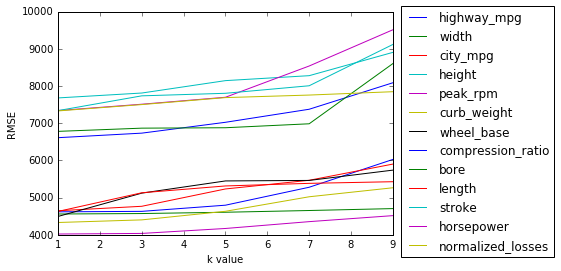

In [78]:
# Plotting each of the numerical columns with the variation in the k value
for k,v in k_feat.items():
    x = sorted(list(v.keys()))
    y = sorted(list(v.values()))
    
    plt.plot(x,y, label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

In [79]:
def knn_train_test(train_cols, target_col, df, k=5):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn = KNeighborsRegressor(n_neighbors = k)
    # Fit a KNN model using selected k value.
    knn.fit(train_df[train_cols], train_df[target_col])
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_cols])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [80]:
# Selecting the top 5 features
top_5_feat = list(train_col_ser.head(6).index)

top_5_dict = {}

# Looking at the top features in aggregate
for i in range(1, len(top_5_feat)):
    # Adding a feature each time
    selected_feat = top_5_feat[0:i+1]
    name_string = "top_" + str(i+1)
    top_5_dict[name_string] = knn_train_test(selected_feat, 'price', numeric_cars)
    
top_5 = pd.Series(top_5_dict).sort_values() 
top_5

top_2    3257.849049
top_5    3341.602454
top_4    3358.691580
top_3    3365.911000
top_6    3628.261188
dtype: float64

## K Optimization

In [81]:
# Optimizing the k value for the highest performing models
top_2_cols = top_5_feat[0:2]

k_25 = list(range(1,26))
top_2_rmse = {}

for i in k_25:
    top_2_rmse[i] = knn_train_test(top_2_cols, 'price', numeric_cars, i)

top_2_s = pd.Series(top_2_rmse)
top_2_rmse

{1: 2790.1071433346656,
 2: 2700.7472352504356,
 3: 3003.7488055243016,
 4: 3106.605625597663,
 5: 3257.849049435976,
 6: 3660.48709284375,
 7: 3776.622550248818,
 8: 3990.519746861657,
 9: 4106.695501428088,
 10: 4292.927729786319,
 11: 4446.49068863902,
 12: 4474.5040774983045,
 13: 4535.433105685562,
 14: 4557.787134869417,
 15: 4626.44623473615,
 16: 4616.715111529423,
 17: 4627.590528180833,
 18: 4591.404760116439,
 19: 4602.10047883103,
 20: 4609.448817726754,
 21: 4643.491685319764,
 22: 4652.902519818285,
 23: 4697.632838416021,
 24: 4738.027378987156,
 25: 4760.49488106037}

In [82]:
# Optimizing the k value for the highest performing models
top_5_cols = top_5_feat[0:6]

k_25 = list(range(1,26))
top_5_rmse = {}

for i in k_25:
    top_5_rmse[i] = knn_train_test(top_5_cols, 'price', numeric_cars, i)

top_5_s = pd.Series(top_5_rmse)
top_5_rmse

{1: 2711.8064473558566,
 2: 2983.298229599695,
 3: 3147.7872363214947,
 4: 3403.6163252822316,
 5: 3628.261188214127,
 6: 3560.755117162712,
 7: 3766.0781859391327,
 8: 3892.1055790125597,
 9: 4058.9711219417254,
 10: 4166.67360017509,
 11: 4269.212015998027,
 12: 4322.589179086113,
 13: 4354.036540959632,
 14: 4401.309355187226,
 15: 4453.998952687242,
 16: 4501.196168590726,
 17: 4526.2347689665985,
 18: 4602.93889872311,
 19: 4688.897400085559,
 20: 4772.5184826673,
 21: 4829.188076586143,
 22: 4872.709482789408,
 23: 4905.43274491528,
 24: 4949.660992656672,
 25: 4991.627970812927}

In [83]:
# Optimizing the k value for the highest performing models
top_4_cols = top_5_feat[0:5]

k_25 = list(range(1,26))
top_4_rmse = {}

for i in k_25:
    top_4_rmse[i] = knn_train_test(top_4_cols, 'price', numeric_cars, i)

top_4_s = pd.Series(top_4_rmse)
top_4_rmse

{1: 2530.0554077602005,
 2: 2897.1757974767684,
 3: 3183.4597426217424,
 4: 3168.0230415758415,
 5: 3341.6024539726504,
 6: 3537.520542998191,
 7: 3817.290452118825,
 8: 4004.414529685573,
 9: 3992.3186041830318,
 10: 4138.728787853335,
 11: 4342.052852829098,
 12: 4416.145381031136,
 13: 4493.8798141857205,
 14: 4463.501601554571,
 15: 4474.480783207805,
 16: 4553.5595362768345,
 17: 4597.001081375769,
 18: 4655.283442648355,
 19: 4687.900893982822,
 20: 4712.022985543165,
 21: 4755.856625823773,
 22: 4788.162720030673,
 23: 4806.923381965054,
 24: 4879.983352195467,
 25: 4923.844843032469}

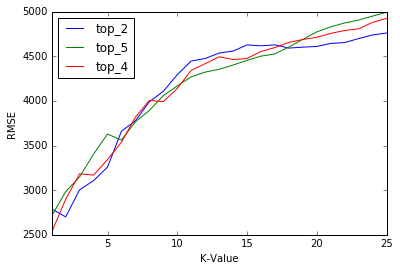

In [84]:
# Merging the series created for each model into a single dataframe 
top_models = pd.concat([top_2_s, top_5_s, top_4_s], axis=1) 
top_models.columns=['top_2', 'top_5', 'top_4']
top_models.plot()
plt.xlabel('K-Value')
plt.ylabel('RMSE')
plt.show()

The RMSEs gets higher as the K-value gets bigger.  The optimal K-value for each of the top performing models is 1 or 2. The model using the Top 4 features, with a K-value of 1 performed best.

## Looking at Cross-Validation 

In [92]:
from sklearn.model_selection import KFold, cross_val_score

# Utilizing KFold and cross_val_score for more robust testing
def knn_train_test(train_cols, target_col, df, k=5, split=2):
    kf = KFold(n_splits=split, shuffle=True, random_state=1)
    
    knn = KNeighborsRegressor(n_neighbors = k)

    # Calculate and return RMSE.
    mses = cross_val_score(knn, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
    rmse = np.sqrt(np.absolute(mses))
    return np.mean(rmse), np.std(rmse)


In [98]:
# Looking at a K-fold of 5 with the best performing model and a K-value of 1
top_4_mean, top_4_std = knn_train_test(top_2_cols, 'price', numeric_cars, 1, 5)

print("The mean RMSE for the Top 4 Features is: {}".format(round(top_4_mean),2))
print("The standard deviation of the RMSE for the Top 4 Features is: {}".format(round(top_4_std),2))

The mean RMSE for the Top 4 Features is: 2562.0
The standard deviation of the RMSE for the Top 4 Features is: 404.0


The cross validation resulted in a value that was very similar to the two-split method that was employeed initially.  